## Understanding Descriptive Statistics

Import the necessary libraries here:

In [ ]:
import random;
import pandas as pd;
import matplotlib.pyplot as plt;

## Challenge 1

### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
Hint: you can use the choices function from module random to help you with the simulation.

In [ ]:
# Variables.
times = 11;

# Find the result of rolling a dice 10 times and store it in a dataframe.
def roll_the_dice(times):
    return random.choices(range(1,7), k=times)

In [ ]:
# Sort the values.
dice_results = pd.DataFrame(roll_the_dice(times), columns=['Value'], index=range(1, times+1));
sorted_dice_results = dice_results.sort_values('Value');

In [ ]:
sorted_dice_results 


,Value
6,2
7,2
9,2
10,2
1,3
4,3
2,4
3,4
11,4
5,6


### 2.- Plot the results sorted by value.

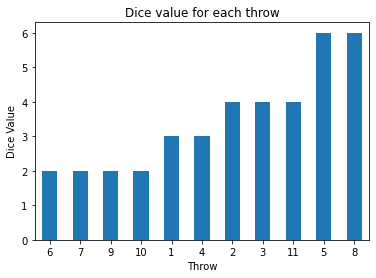

In [ ]:
sorted_dice_results[['Value']].plot(kind='bar', legend=None, rot=0);
plt.xlabel('Throw');
plt.ylabel('Dice Value');
plt.title('Dice value for each throw');
plt.show();

### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

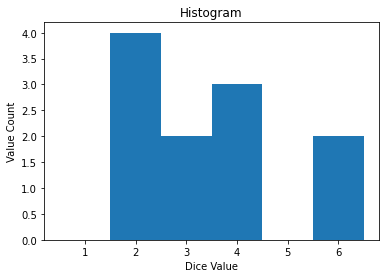

In [ ]:
bins = [n + 0.5 for n in range(0,7)];
dice_results.hist(bins=bins, grid=False);
plt.xlabel('Dice Value');
plt.ylabel('Value Count');
plt.title('Histogram');

# Show the plot.
plt.show()

`Comments:`

Both plots shows how many times a number has been rolled. From both plots we can see that number 1 only showed 1 times, number 2 showed 3 times, etc.

## Challenge 2

Now, using the dice results obtained in challenge 1, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles.

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value.

In [ ]:
def reset_df_indexes(df):
    df = df.reset_index(drop=True)
    df.index = range(1,len(df)+1)
    return df

def mean_calculation_method_one(df):
    return df['Value'].sum() / len(df['Value'])

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value.

In [ ]:
def mean_calculation_method_two(df):
    frequency = df['Value'].value_counts().values
    dice_value = df['Value'].value_counts().index
    return sum(dice_value * frequency) / len(df['Value'])


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value.
Hint: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [ ]:
def median_calculation(df):
    if len(df['Value']) % 2 == 0:
        x=(df['Value'][len(df) // 2] + df['Value'][(len(df) // 2) - 1]) / 2
    else:
        x=df['Value'][(len(df) // 2) - 1]
    return x

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles.

In [ ]:
def quartiles_calculation(df):
    Q2 = median_calculation(df)
    index = len(sorted_dice_results['Value']) // 2
    if len(df['Value']) % 2 == 0:
        lower_df = df.iloc[0:index]
        upper_df = df.iloc[index:]
    else:
        lower_df = df.iloc[0:index-1]
        upper_df = df.iloc[index+1:]
    upper_df = reset_df_indexes(upper_df)
    Q1 = median_calculation(lower_df)
    Q3 = median_calculation(upper_df)
    return Q1,Q2,Q3

In [ ]:
#Another Method: 
def quartiles(df):
    Q2 = median_calculation(df)
    Q = df['Value'].quantile([0.25,0.5,0.75])
    return Q
quartiles(df)

In [ ]:
sorted_dice_results = reset_df_indexes(sorted_dice_results)
Q1, Q2, Q3 = quartiles_calculation(sorted_dice_results)

In [ ]:
print(f'The event was: \n\n {sorted_dice_results}\n')
print(f'Mean Method 1: {mean_calculation_method_one(dice_results)}')
print(f'Mean Method 2: {mean_calculation_method_two(dice_results)}')
print(f'Median: {median_calculation(sorted_dice_results)}')
print(f'Q1: {Q1}')
print(f'Q2: {Q2}')
print(f'Q3: {Q3}')

The event was: 

     Value
1       2
2       2
3       2
4       2
5       3
6       3
7       4
8       4
9       4
10      6
11      6

Mean Method 1: 3.4545454545454546
Mean Method 2: 3.4545454545454546
Median: 3
Q1: 2.0
Q2: 3
Q3: 4


In [ ]:
sorted_dice_results.describe()

,Value
count,11.000000
mean,3.454545
std,1.507557
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


## Challenge 3

Read the csv `roll_the_dice_hundred.csv`

In [ ]:
roll_the_dice_hundred = pd.read_csv(r'data/roll_the_dice_hundred.csv', index_col=0)
roll_the_dice_hundred.columns = ['Roll', 'Value']

FileNotFoundError: ignored

#### 1.- Sort the values and plot them. What do you see?

In [ ]:
sorted_roll_the_dice_hundred = roll_the_dice_hundred.sort_values('Value')

NameError: ignored

In [ ]:
sorted_roll_the_dice_hundred

,Roll,Value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


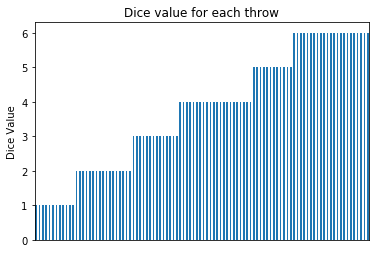

In [ ]:
# Plot the sorted values.
sorted_roll_the_dice_hundred[['Value']].plot(kind='bar', legend=None, rot=0)
plt.xticks([])
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

In [ ]:
taf

`Comments:`

We can see if a number was rolled more times than another one. For example, we can see than number 1 showed less times than number 6. 

#### 2.- Using the functions you defined in challenge 2, calculate the mean value of the hundred dice rolls.

In [ ]:
print('Mean Method 1: {}'.format(mean_calculation_method_one(roll_the_dice_hundred)))
print('Mean Method 2: {}'.format(mean_calculation_method_two(roll_the_dice_hundred)))

Mean Method 1: 3.74
Mean Method 2: 3.74


#### 3.- Now, calculate the frequency distribution.

In [ ]:
# Calculate the frequency distribution.
frequency = roll_the_dice_hundred['Value'].value_counts(sort=False)
frequency

1    12
2    17
3    14
4    22
5    12
6    23
Name: Value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram?

Text(0.5, 1.0, 'Histogram')

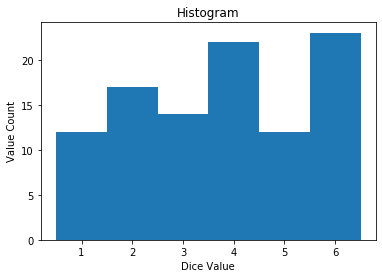

In [ ]:
# Histogram.
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_hundred['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')


`Comments:`

We know that the probability of each number is the same (1/6), so the frequency of each number should be similar and we should expect to see a uniform histogram. However, we can see that the numbers that showed most times are 4 and 6, and their frequency is significantly greater than the frequency of 1 and 5, which showed the least. That's why the mean value is greater than 3 (almost 4).  

#### 5.- Read the roll_the_dice_thousand.csv from the data folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [ ]:
roll_the_dice_thousand = pd.read_csv(r'\roll_the_dice_thousand.csv', index_col=0)
roll_the_dice_thousand.columns = ['Roll', 'Value']

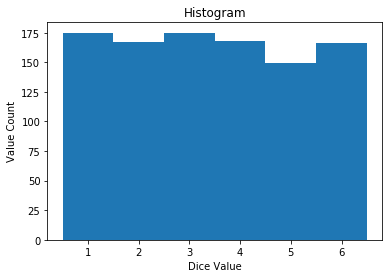

1    175
2    167
3    175
4    168
5    149
6    166
Name: Value, dtype: int64

In [ ]:
# Calculate the frequency distribution.
frequency = roll_the_dice_thousand['Value'].value_counts(sort=False)

# Histogram
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_thousand['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

# Show the plot.
plt.show()
frequency

`Comments:`

In this plot we can see that the distribution is now more uniform than before, which is the behaviour we were expecting because all numbers are equally probable. The histogram changed because now we have more samples of random dice rolls and the sample distribution tends to be more similar to the population distribution.

## Challenge 4
In the data folder of this repository you will find three different files with the prefix ages_population. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

 #### 1. Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot.

In [ ]:
# Read the csv
ages_population = pd.read_csv(r'/ages_population.csv')
ages_population = ages_population.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population['observation'].max()) + 1
min_range = int(ages_population['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

NameError: ignored

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
ages_population['observation'].describe()

count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

#### 3.- Now read the file ages_population2.csv . Calculate the frequency distribution and plot it.

In [ ]:
# Read the csv
ages_population_2 = pd.read_csv('ages_population2.csv')
ages_population_2 = ages_population_2.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_2['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_2['observation'].max()) + 1
min_range = int(ages_population_2['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_2['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

NameError: ignored

#### 4.- What do you see? Is there any difference with the frequency distribution in step 1?

`Comments:`

It seems that this time we have a narrower range of ages. Now, the mean value should be around 27 and the standard deviation around 2. We can see that the people in this neighbourhood are younger compared to the first neighbourhood, where the range was wider and there was more middle-aged people. 

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
ages_population_2['observation'].describe()

count    1000.000000
mean       27.155000
std         2.969814
min        19.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: observation, dtype: float64

`Comments:`

The exact results are similar to the ones expected.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file ages_population3.csv. Calculate the frequency distribution and plot it.

In [ ]:
# Read the csv
ages_population_3 = pd.read_csv('ages_population3.csv')
ages_population_3 = ages_population_3.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_3['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_3['observation'].max()) + 1
min_range = int(ages_population_3['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_3['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

NameError: ignored

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
ages_population_3['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
ages_population_3['observation'].quantile(0.85)

64.0

`Comments:`

We can see that the distribution is now formed by two normals. The first one is centered around 35 and is formed by a lot more samples than the second one, which is centered around 68 approximately. 

If we take a look at the quartiles, we can see that 75% of the samples have a value lower or equal to 53, which would be part of the first normal. So the second normal is formed by approximately the 25% of the total samples. If we check the 85% quantile, we can see that 15% of the samples are greater or equal than 64, which is the approximately the limit between both normals. So we can say that, more exactly, the first normal is formed by approximately 85% of the samples while the second is formed by 15% of the samples. 

The mean is higher than the median because it is more affected by the second normal. However, the median is lower because it is more robust to extreme values.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
sumamry_df = pd.concat([ages_population['observation'], 
                        ages_population_2['observation'], 
                        ages_population_3['observation']], 
                        axis=1, keys=['df1', 'df2', 'df3'])
sumamry_df.describe()

,df1,df2,df3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000
